# Resolviendo no estacionariedad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron,KPSS,DFGLS,ADF
from prettytable import PrettyTable
import numpy as np

bolsas = pd.read_csv("bolsas2.csv")
imacec = pd.read_csv("imacec.csv")
cobrepetroleo = pd.read_csv("cobre_petroleo.csv")
desempleo = pd.read_csv("desempleo.csv")
tipocambio = pd.read_csv("tipocambio.csv")

### indice dow jones

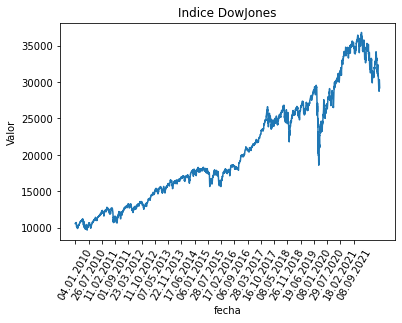

In [6]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['dowjones'])
plt.xticks(range(0, 3000, 140))  
plt.xticks(rotation=60) 
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice DowJones")
plt.show()

In [7]:
#print(bolsas["dowjones"][0:136])
adf = ADF(bolsas["dowjones"])
pp = PhillipsPerron(bolsas["dowjones"])
kpss = KPSS(bolsas["dowjones"])
df = DFGLS(bolsas["dowjones"])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])

In [8]:
print(x)

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.772735 | The process contains a unit root. |
|      PhillipsPerron      | 0.768562 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.893501 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


basado en los resultados de las pruebas de raiz unitaria observamos que la serie es estacionaria en tendencia por lo que aplicaremos una diferencia para conseguir estacionariedad estricta.

<AxesSubplot:>

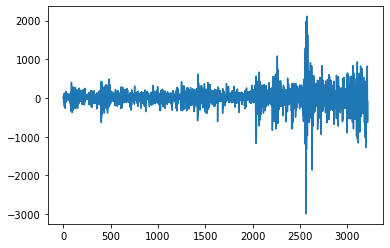

In [9]:
bolsas["dowjones_diff"] = bolsas["dowjones"]-bolsas["dowjones"].shift(1)
bolsas["dowjones_diff"].dropna().plot()

In [10]:
#print(bolsas["dowjones"][0:136])
adf = ADF(bolsas["dowjones_diff"].dropna())
pp = PhillipsPerron(bolsas["dowjones_diff"].dropna())
kpss = KPSS(bolsas["dowjones_diff"].dropna())
df = DFGLS(bolsas["dowjones_diff"].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.891173 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


## Indice vix

In [ ]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['vix'])
plt.xticks(range(0, 3000, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice VIX")

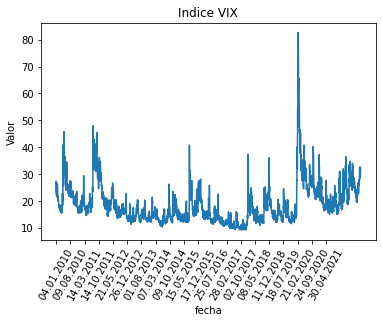

In [12]:
plt.show()

### Pruebas de raiz unitaria 

In [14]:
adf = ADF(bolsas['vix'])
pp = PhillipsPerron(bolsas['vix'])
kpss = KPSS(bolsas['vix'])
df = DFGLS(bolsas['vix'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])

In [15]:
print(x)

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |  4e-06   | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.003903 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |  3e-06   | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


La serie es estacionaria

### Indice sp500

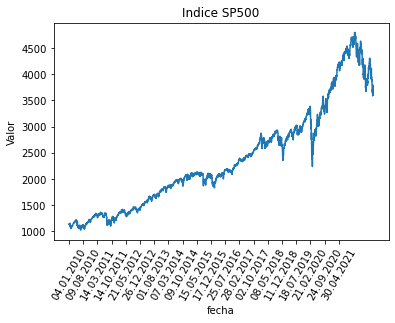

In [18]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['sp500'])
plt.xticks(range(0, 3000, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice SP500")
plt.show()

In [19]:
adf = ADF(bolsas['sp500'])
pp = PhillipsPerron(bolsas['sp500'])
kpss = KPSS(bolsas['sp500'])
df = DFGLS(bolsas['sp500'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])

In [20]:
print(x)

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.840866 | The process contains a unit root. |
|      PhillipsPerron      | 0.827077 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.923655 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


segun el test KPSS la serie es estacionaria en tendencio por lo cual eliminaremos la tendencia usando diferenciacion.

<AxesSubplot:>

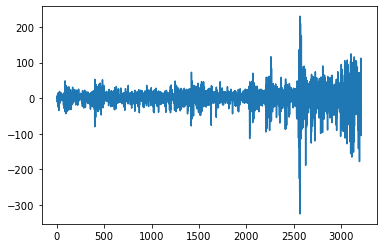

In [21]:
bolsas["sp500_diff"] = bolsas["sp500"]-bolsas["sp500"].shift(1)
bolsas["sp500_diff"].dropna().plot()

In [22]:
#print(bolsas["dowjones"][0:136])
adf = ADF(bolsas["sp500_diff"].dropna())
pp = PhillipsPerron(bolsas["sp500_diff"].dropna())
kpss = KPSS(bolsas["sp500_diff"].dropna())
df = DFGLS(bolsas["sp500_diff"].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.838916 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


Ahora podemos ver numericamente y vizualmente que la serie si es estacionaria..

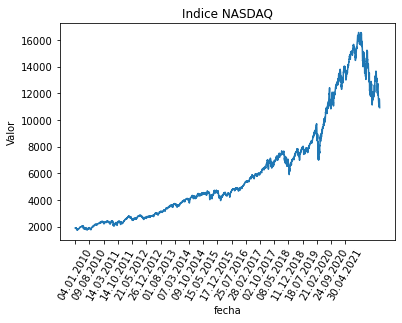

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.893808 | The process contains a unit root. |
|      PhillipsPerron      | 0.875395 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.921113 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [15]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['nasdaq'])
plt.xticks(range(0, 3000, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice NASDAQ")
plt.show()

adf = ADF(bolsas['nasdaq'])
pp = PhillipsPerron(bolsas['nasdaq'])
kpss = KPSS(bolsas['nasdaq'])
df = DFGLS(bolsas['nasdaq'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

segun el test KPSS la serie es estacionaria en tendencio por lo cual eliminaremos la tendencia usando diferenciacion.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.535969 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


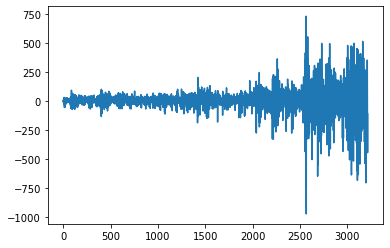

In [16]:
bolsas["nasdaq_diff"] = bolsas["nasdaq"]-bolsas["nasdaq"].shift(1)
bolsas["nasdaq_diff"].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(bolsas["nasdaq_diff"].dropna())
pp = PhillipsPerron(bolsas["nasdaq_diff"].dropna())
kpss = KPSS(bolsas["nasdaq_diff"].dropna())
df = DFGLS(bolsas["nasdaq_diff"].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Ahora la serie si es estacionaria estricta

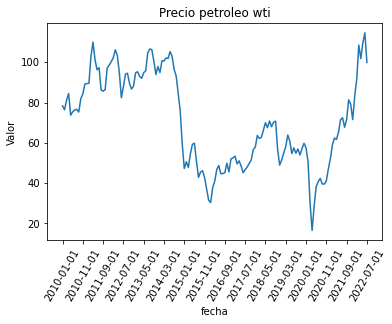

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.434938 | The process contains a unit root. |
|      PhillipsPerron      | 0.448314 | The process contains a unit root. |
|           KPSS           | 0.015325 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.093158 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [17]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['petroleo wti'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio petroleo wti")
plt.show()

adf = ADF(cobrepetroleo['petroleo wti'])
pp = PhillipsPerron(cobrepetroleo['petroleo wti'])
kpss = KPSS(cobrepetroleo['petroleo wti'])
df = DFGLS(cobrepetroleo['petroleo wti'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

segun el test KPSS la serie es estacionaria en tendencio por lo cual eliminaremos la tendencia usando diferenciacion.

+--------------------------+---------+-----------------------------------+
|    Unitary root test     | P-Value |           Hipotesis Nula          |
+--------------------------+---------+-----------------------------------+
| Argumented Dickey Fuller |   0.0   | The process contains a unit root. |
|      PhillipsPerron      |   0.0   | The process contains a unit root. |
|           KPSS           | 0.38396 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0   | The process contains a unit root. |
+--------------------------+---------+-----------------------------------+


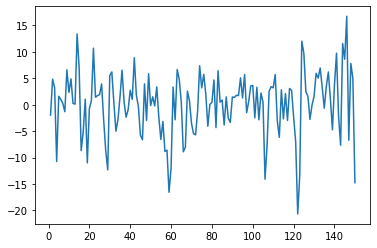

In [18]:
cobrepetroleo["petroleo wti_diff"]= cobrepetroleo['petroleo wti']-cobrepetroleo['petroleo wti'].shift(1)
cobrepetroleo['petroleo wti_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(cobrepetroleo['petroleo wti_diff'].dropna())
pp = PhillipsPerron(cobrepetroleo['petroleo wti_diff'].dropna())
kpss = KPSS(cobrepetroleo['petroleo wti_diff'].dropna())
df = DFGLS(cobrepetroleo['petroleo wti_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

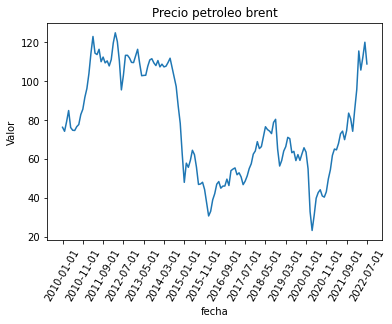

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.551204 | The process contains a unit root. |
|      PhillipsPerron      | 0.492332 | The process contains a unit root. |
|           KPSS           | 0.013572 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.135008 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [19]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['petroleo brent'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio petroleo brent")
plt.show()


adf = ADF(cobrepetroleo['petroleo brent'])
pp = PhillipsPerron(cobrepetroleo['petroleo brent'])
kpss = KPSS(cobrepetroleo['petroleo brent'])
df = DFGLS(cobrepetroleo['petroleo brent'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

segun el test KPSS la serie es estacionaria en tendencio por lo cual eliminaremos la tendencia usando diferenciacion.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.306323 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


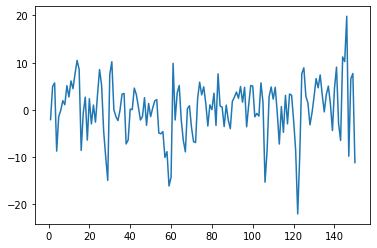

In [20]:
cobrepetroleo["petroleo brent_diff"]= cobrepetroleo['petroleo brent']-cobrepetroleo['petroleo brent'].shift(1)
cobrepetroleo['petroleo brent_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(cobrepetroleo['petroleo brent_diff'].dropna())
pp = PhillipsPerron(cobrepetroleo['petroleo brent_diff'].dropna())
kpss = KPSS(cobrepetroleo['petroleo brent_diff'].dropna())
df = DFGLS(cobrepetroleo['petroleo brent_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

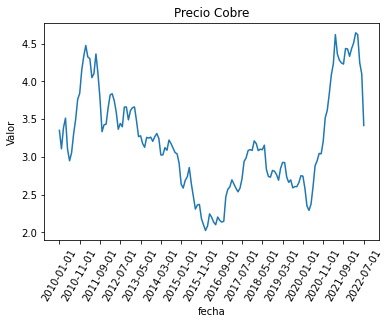

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.16171  | The process contains a unit root. |
|      PhillipsPerron      | 0.310265 | The process contains a unit root. |
|           KPSS           | 0.118115 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.022173 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [21]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['cobre'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio Cobre")
plt.show()

adf = ADF(cobrepetroleo['cobre'])
pp = PhillipsPerron(cobrepetroleo['cobre'])
kpss = KPSS(cobrepetroleo['cobre'])
df = DFGLS(cobrepetroleo['cobre'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

La serie no es estacionaria y debemos aplicar un metodo distinto a la diferenciacion para conseguir estacionariedad. Aplicaremos transformacion y una posterior diferenciacion para conseguir estabilizar la varianza y conseguir estacionariedad.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.001053 | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.437311 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.101001 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


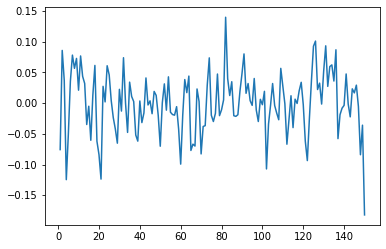

In [22]:
cobrepetroleo["cobre_log"] = np.log(cobrepetroleo["cobre"])
cobrepetroleo["cobre_log_diff"]= cobrepetroleo['cobre_log']-cobrepetroleo['cobre_log'].shift(1)
cobrepetroleo['cobre_log_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(cobrepetroleo['cobre_log_diff'].dropna())
pp = PhillipsPerron(cobrepetroleo['cobre_log_diff'].dropna())
kpss = KPSS(cobrepetroleo['cobre_log_diff'].dropna())
df = DFGLS(cobrepetroleo['cobre_log_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

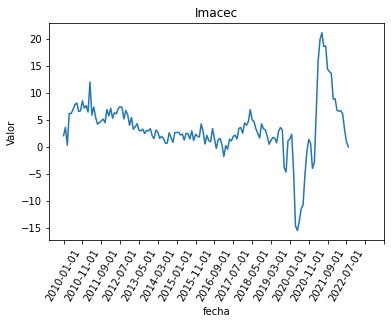

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.083931 | The process contains a unit root. |
|      PhillipsPerron      | 0.029553 | The process contains a unit root. |
|           KPSS           | 0.350128 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.010477 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [23]:
fig,ax = plt.subplots()
plt.plot(imacec['fecha'], imacec['imacec'])
plt.xticks(range(0, 180, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Imacec")
plt.show()

adf = ADF(imacec['imacec'])
pp = PhillipsPerron(imacec['imacec'])
kpss = KPSS(imacec['imacec'])
df = DFGLS(imacec['imacec'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

La serie no es estacionaria en tendencia y posee varianza inestable, aplicaremos transformacion y diferenciacion para solucionar la estacionariedad.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |  6e-06   | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.344979 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.022217 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


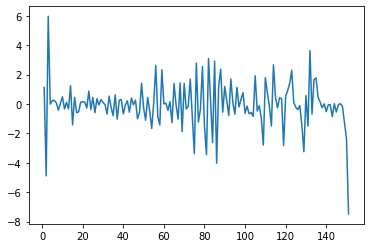

In [24]:
imacec["imacec_square"] = np.power(imacec['imacec'],2)
imacec["imacec_log"] = np.log(imacec['imacec_square'])
imacec["imacec_log_diff"]= imacec['imacec_log']-imacec['imacec_log'].shift(1)
imacec['imacec_log_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(imacec['imacec_log_diff'].dropna())
pp = PhillipsPerron(imacec['imacec_log_diff'].dropna())
kpss = KPSS(imacec['imacec_log_diff'].dropna())
df = DFGLS(imacec['imacec_log_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

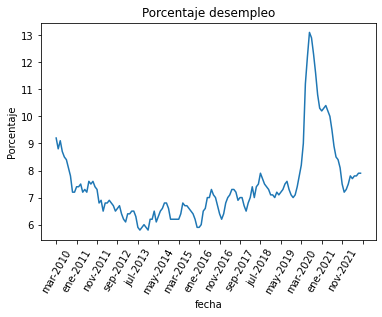

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.174607 | The process contains a unit root. |
|      PhillipsPerron      | 0.191881 | The process contains a unit root. |
|           KPSS           | 0.023405 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.122217 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [25]:
fig,ax = plt.subplots()
plt.plot(desempleo['fecha'], desempleo['porcentaje'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Porcentaje")
plt.title("Porcentaje desempleo")
plt.show()

adf = ADF(desempleo['porcentaje'])
pp = PhillipsPerron(desempleo['porcentaje'])
kpss = KPSS(desempleo['porcentaje'])
df = DFGLS(desempleo['porcentaje'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Segun los test la serie no es estacionaria estricta pero si en tendendia por lo cual aplicaremos solo diferenciacion.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.575418 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 3.1e-05  | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


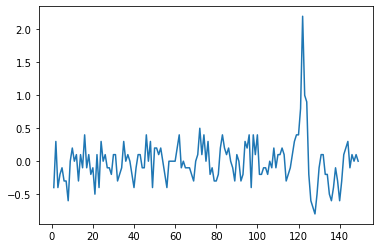

In [60]:
desempleo["porcentaje_diff"]= desempleo['porcentaje']-desempleo['porcentaje'].shift(1)
desempleo['porcentaje_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(desempleo['porcentaje_diff'].dropna())
pp = PhillipsPerron(desempleo['porcentaje_diff'].dropna())
kpss = KPSS(desempleo['porcentaje_diff'].dropna())
df = DFGLS(desempleo['porcentaje_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

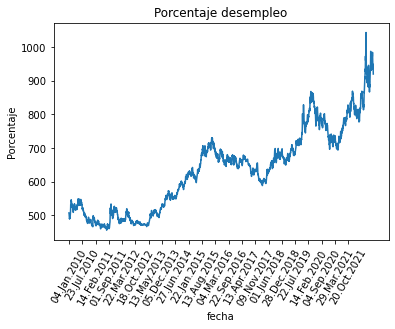

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.985652 | The process contains a unit root. |
|      PhillipsPerron      | 0.945697 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.976104 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [29]:
fig,ax = plt.subplots()
plt.plot(tipocambio['Dia'], tipocambio['Valor'])
plt.xticks(range(0, 3500, 140))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Valor tipo cambio")
plt.show()

adf = ADF(tipocambio['Valor'])
pp = PhillipsPerron(tipocambio['Valor'])
kpss = KPSS(tipocambio['Valor'])
df = DFGLS(tipocambio['Valor'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Observamos que no es estacionaria estricta pero si en tendencia por lo cual aplicamos diferenciacion para solucionar problemas de estacionariedad.

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.623559 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


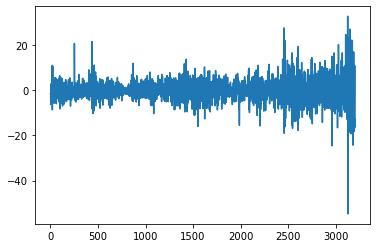

In [30]:
tipocambio['Valor_diff']= tipocambio['Valor']-tipocambio['Valor'].shift(1)
tipocambio['Valor_diff'].dropna().plot()
#print(bolsas["dowjones"][0:136])
adf = ADF(tipocambio['Valor_diff'].dropna())
pp = PhillipsPerron(tipocambio['Valor_diff'].dropna())
kpss = KPSS(tipocambio['Valor_diff'].dropna())
df = DFGLS(tipocambio['Valor_diff'].dropna())
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

## Forecasting

In [26]:
tipocambio.head()
tipocambio.Dia

fechaindex = pd.to_datetime(tipocambio['Dia'], format='%d.%b.%Y')
tipocambio.index = fechaindex
# del(tipocambio['Unnamed: 0'])
# del(tipocambio['Dia'])


## Modelo

In [23]:
#armar data 
#observar data y pasar fecha a indice
tipocambio.head()
cobrepetroleo.head()
'''
se comentan los codigos ya que son ejecutables una sola vez 
'''
#cobrepetroleo.index =  pd.to_datetime(cobrepetroleo['fecha'], format='%Y.%m.%d')
#del(cobrepetroleo['fecha'])
#cobrepetroleo.head()

#bolsas.index = pd.to_datetime(bolsas['fecha'],format='%d.%m.%Y')
#del(bolsas['Unnamed: 0'])
#del(bolsas['fecha'])
#bolsas.head()

#imacec.index = pd.to_datetime(imacec['fecha'],format='%Y-%m-%d')
#del(imacec['Unnamed: 0'])
#del(imacec['fecha'])
#print(cobrepetroleo.info())
#print(imacec.info())
#print(tipocambio.info())
#print(bolsas.info())
#imacec.head()

'\nse comentan los codigos ya que son ejecutables una sola vez \n'

In [25]:
tipocambio.head()

,Unnamed: 0,Dia,Valor
0,1,04.Jan.2010,507.10
1,2,05.Jan.2010,505.70
2,3,06.Jan.2010,504.22
3,4,07.Jan.2010,497.93
4,5,08.Jan.2010,494.54


In [27]:
#matrix X

#primero hacer match entre las fechas
rango = pd.date_range(start='2010-01-04',end='2022-07-01',freq='M')
rango

def prom_mes(ser,rango,nombrecolumn):
    serie = ser
    column = list()
    prome = serie[serie.index < rango[0]].mean()
    column.append(float(prome))
    for i in range(1,len(rango)):
        prome = serie[serie.index < rango[i]]
        prome = prome[prome.index > rango[i-1]].mean()
        column.append(float(prome))
        pass
    serienew = pd.Series(column, index=rango)
    df       = pd.DataFrame({nombrecolumn: serienew})
    return df

def sort_mes(ser,rango,nombrecolumn):
    serie = ser
    column = list()
    prome = serie[serie.index < rango[0]].mean()
    column.append(float(prome))
    for i in range(1,len(rango)):
        prome = serie[serie.index < rango[i]]
        prome = prome[prome.index > rango[i-1]].mean()
        column.append(float(prome))
        pass
    serienew = pd.Series(column, index=rango)
    df       = pd.DataFrame({nombrecolumn: serienew})
    return df

#como acceder a primer dia del mes teniendo el ultimo dia del mes
tipocambio[tipocambio.index < rango[0]]
tipocambio[tipocambio.index < rango[1]]
 
dftc = prom_mes(tipocambio,rango,"valor tipo cambio")
dftc.info()

dfsp500 = prom_mes(bolsas['sp500'],rango,'sp500')
dfsp500.head()
dfvix   = prom_mes(bolsas['vix'],rango,'vix')
dfvix.head()

dfcobre = sort_mes(cobrepetroleo['cobre'],rango,'cobre')
dfcobre.head()

dfimacec = sort_mes(imacec,rango,"imacec")
dfimacec.head()

dfcombb = sort_mes(cobrepetroleo['petroleo brent'],rango,"petroleo brent")
dfcombb.head()

dfcombw = sort_mes(cobrepetroleo['petroleo wti'],rango,"petroleo wti")
dfcombw.head()

Y = prom_mes(tipocambio,rango,"valor tipo cambio")
Y = Y.drop(index="2010-01-31")
Y = Y.drop(index="2010-02-28")
# 7 df...
# hacer transformacion y armar matrix X para estimar betas por mco
#X=X.drop(index="2010-01-31")
#X=X.drop(index="2010-02-28")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2010-01-31 to 2022-06-30
Freq: M
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor tipo cambio  150 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'Timestamp'

In [240]:
k=list()
[k.append(1) for i in range(150)]
skf = pd.Series(k, index=rango)
constant= pd.DataFrame({'constant': skf})

In [241]:
p_combustible = 1/2*(dfcombb['petroleo brent']+dfcombw['petroleo wti'])
ltc = np.log(dftc)
lpc = np.log(dfcobre)
lpcombu = np.log(p_combustible)

In [242]:
def tasa_c(serie):
    num  = serie-serie.shift(1)
    resu = num/serie
    return resu*100

In [243]:
dltc      = ltc - ltc.shift(1)
dlpcobre  = lpc - lpc.shift(1) 
dlpcombus = lpcombu - lpcombu.shift(1)

csp500    = tasa_c(dfsp500)
cvix      = tasa_c(dfvix)
cimacec   = tasa_c(dfimacec)
cdesempleo= tasa_c(desempleo['porcentaje'])

In [244]:
#dlpcombus.head()
#type(dlpcombus)
dlpcombus= pd.DataFrame({'petroleo': dlpcombus})


In [245]:
# unity root test
def roottest(serie):
    adf = ADF(serie.dropna())
    pp = PhillipsPerron(serie.dropna())
    kpss = KPSS(serie.dropna())
    df = DFGLS(serie.dropna())
    x = PrettyTable()
    x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
    x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
    x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
    x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
    x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
    print(x)
    return

roottest(dlpcombus)


+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |   0.0    | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.335972 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |   0.0    | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [246]:
# matriz x
X=0
X = constant.merge(dltc.shift(0), how='inner', left_index=True, right_index=True)
X = X.merge(dlpcobre.shift(0), how='inner', left_index=True, right_index=True)
X = X.merge(dlpcobre.shift(1), how='inner', left_index=True, right_index=True)
X = X.merge(csp500, how='inner', left_index=True, right_index=True)
X = X.merge(csp500.shift(1), how='inner', left_index=True, right_index=True)
X = X.merge(cvix, how='inner', left_index=True, right_index=True)
X = X.merge(cvix.shift(1), how='inner', left_index=True, right_index=True)
X = X.merge(cimacec, how='inner', left_index=True, right_index=True)
X = X.merge(cimacec.shift(1), how='inner', left_index=True, right_index=True)
X = X.merge(dlpcombus, how='inner', left_index=True, right_index=True)
X = X.merge(dlpcombus.shift(1), how='inner', left_index=True, right_index=True)

X=X.drop(index="2010-01-31")
X=X.drop(index="2010-02-28")

X.head()

,constant,valor tipo cambio,cobre_x,cobre_y,sp500_x,sp500_y,vix_x,vix_y,imacec_x,imacec_y,petroleo_x,petroleo_y
2010-03-31,1,-0.018069,0.085952,-0.075637,5.393978,-3.160379,-12.484143,-26.815069,-1054.143327,42.817996,0.062995,-0.026258
2010-04-30,1,-0.004627,0.037122,0.085952,3.889382,5.393978,29.836064,-12.484143,94.945229,-1054.143327,0.054198,0.062995
2010-05-31,1,0.024308,-0.124608,0.037122,-6.469466,3.889382,27.682665,29.836064,-0.385186,94.945229,-0.122115,0.054198
2010-06-30,1,0.005480,-0.050754,-0.124608,-3.609454,-6.469466,-20.604703,27.682665,10.664730,-0.385186,0.001399,-0.122115
2010-07-31,1,-0.008662,0.035660,-0.050754,-0.561654,-3.609454,-16.199896,-20.604703,11.568590,10.664730,0.005975,0.001399


## Estimacion de parametros por MCO

In [247]:
# X'X)^(-1)%*%X'Y

#convertir data X a matriz

Xarr = X.to_numpy()
Yarr = Y.to_numpy()

xtx      = np.dot(Xarr.transpose(),Xarr)
invxtx   = np.linalg.inv(xtx)
invxtxxt = np.dot(invxtx,Xarr.transpose())
betas    = np.dot(invxtxxt,Yarr)
c,phi,f0,f1,y0,y1,theta0,theta1,e0,e1,eta0,eta1 = betas

print(betas)

[[ 6.31928402e+02]
 [ 1.10818323e+03]
 [ 4.56692842e+02]
 [ 2.08577532e+02]
 [-5.49541519e+00]
 [-5.40861282e+00]
 [ 2.42101834e-01]
 [-2.41144422e-01]
 [ 5.56377570e-02]
 [ 6.22476805e-02]
 [ 1.13259741e+02]
 [-2.30465911e+01]]


In [248]:
import statsmodels.api as sm

model = sm.OLS(Y,X)
results = model.fit()
results.params
'''
 Observamos valores mayores que 1 en valor absoluto a pesar de haber analisado la estacionaridad de las series
'''

constant              631.928402
valor tipo cambio    1108.183235
cobre_x               456.692842
cobre_y               208.577532
sp500_x                -5.495415
sp500_y                -5.408613
vix_x                   0.242102
vix_y                  -0.241144
imacec_x                0.055638
imacec_y                0.062248
petroleo_x            113.259741
petroleo_y            -23.046591
dtype: float64

In [263]:
#modelo
dltcestim = c*X.constant + phi*X['valor tipo cambio'] + f0*X.cobre_x + f1*X.cobre_y + y0*X.sp500_x + y1*X.sp500_y + theta0*X.vix_x + theta1*X.vix_y + e0*X.imacec_x + e1*X.imacec_y + eta0*X.petroleo_x + eta1*X.petroleo_y #+ error
#c,phi,f0,f1,y0,y1,theta0,theta1,e0,e1,eta0,eta1
#estimar por MCO
dltcestim.head

<bound method NDFrame.head of 2010-03-31    578.031630
2010-04-30    565.719035
2010-05-31    614.533324
2010-06-30    635.536475
2010-07-31    653.636744
                 ...    
2022-02-28    656.219659
2022-03-31    671.494357
2022-04-30    654.749352
2022-05-31    696.586704
2022-06-30    666.334956
Freq: M, Length: 148, dtype: float64>

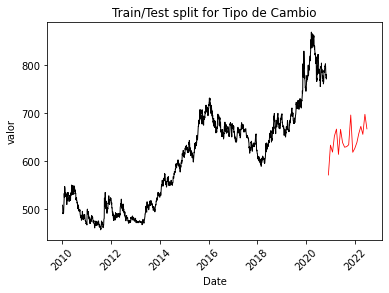

In [262]:
#test train data
train = tipocambio[tipocambio.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test  = dltcestim[dltcestim.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black",linewidth=1)
plt.plot(test, color = "red",linewidth=0.8)
plt.ylabel('valor')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Tipo de Cambio")
plt.show()
# la estimacion es malisima

## Calculando las IRF

In [293]:
# funcion para calcular irf

def irf(phi,beta0,beta1,periodos):
    phi   = float(phi)
    beta0 = float(beta0)
    beta1 = float(beta1)
    irf   = list()
    for i in range(periodos):
        irf.append(phi**(i-1) * ( phi*beta0 + beta1))
    return irf


## IRF para el cobre

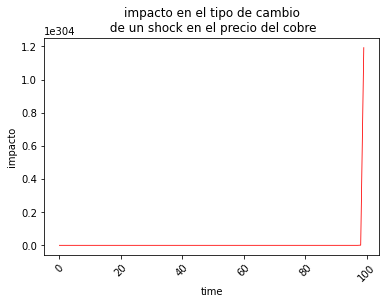

In [294]:
irfcobre = irf(phi,f0,f1,100)
plt.plot(irfcobre, color = "red",linewidth=0.8)
plt.ylabel('impacto')
plt.xlabel('time')
plt.xticks(rotation=45)
plt.title("impacto en el tipo de cambio\n de un shock en el precio del cobre")
plt.show()

## IRF para el vix

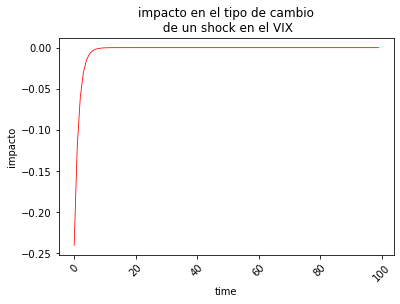

In [299]:
irfvix = irf(0.5,theta0,theta1,100)
plt.plot(irfvix, color = "red",linewidth=0.8)
plt.ylabel('impacto')
plt.xlabel('time')
plt.xticks(rotation=45)
plt.title("impacto en el tipo de cambio\n de un shock en el VIX")
plt.show()

## IRF para el imacec

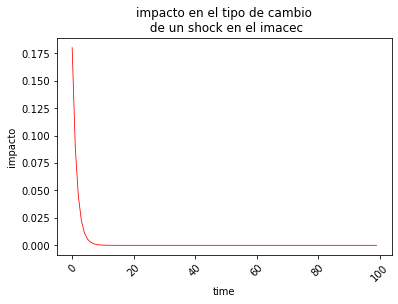

In [298]:
irfimacec = irf(0.5,e0,e1,100) # dado que el |phi| > 1 las irf no tienen sentido
plt.plot(irfimacec, color = "red",linewidth=0.8)
plt.ylabel('impacto')
plt.xlabel('time')
plt.xticks(rotation=45)
plt.title("impacto en el tipo de cambio\n de un shock en el imacec")
plt.show()

no alcanze mas :(